# **Diabetes Prediction** Model


---


---



### **Description of the Dataset**

The data were collected from the Iraqi society and acquired from the laboratory of Medical City Hospital (the Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital).

Patients' files were taken and data extracted from them and entered in to the database to construct the diabetes dataset. The data consist of medical information, laboratory analysis.

The data consist of medical information, laboratory analysis, etc. The data that have been entered initially into the system are:

* ***ID***

* Number of Patient as ***No_Pation***

* Gender as ***Gender***

* Age as ***AGE***

* Urea as ***Urea***

* Creatinine ratio as ***Cr***

* The average blood glucose level over the past three months as ***HbA1c***,

* Fasting lipid profile including total Cholesterol as ***Chol***, Triglycerides as ***TG***, ***HDL*** Cholesterol, ***LDL***, ***VLDL***

* Body Mass Index as ***BMI***

* Class (the patient's diabetes disease class may be Diabetic, Non-Diabetic, or PreDiabetic) as ***CLASS***

https://data.mendeley.com/datasets/wj9rwkp9c2/1


---

## **1 - Loading Dataset**



---



In [60]:
# Importing important and the most used libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Uploading and reading data From the Google drive

data_id = "1B8g8zOF_LRf-O117vcBLDXzIOKwULWOA"
dwn_url='https://drive.google.com/uc?id='
data = pd.read_csv(dwn_url+data_id)
data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y




---

## **2 - Feature Engineering and Data Cleaning**

---





In [62]:
# Taking a look at the data summary statistics

data.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [63]:
#  Checking how the overal dataset looks like (Any null values? data types? dataframe shape?)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [64]:
# Particularly interested in how many categories exist in 'CLASS' column and how much patients do exist in each category.
# p.n: 'CLASS' column is the "target variable" that classifies Non-diabiteic (N), Pre-diabetic (P) and Diabetic patients (Y) in 3 Classes.

data["CLASS"].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [65]:
#  There are redundant categories perhaps due to typing error, let's check!

data[(data["CLASS"] == "Y ") | (data["CLASS"] == "N ")]

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
102,435,34241,M,38,6.1,83,5.4,4.5,1.7,0.9,2.8,0.8,24.6,N
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


In [66]:
# Removing empty spaces and therfore categorizing 'CLASS' column into 3 categories (N, P, Y)

data["CLASS"] = data["CLASS"].str.strip()

In [67]:
# Checking if now the 'CLASS' column is clean

data["CLASS"].value_counts()

Y    844
N    103
P     53
Name: CLASS, dtype: int64

In [68]:
# For easier readability of the code, let's change 'N': 'Non-Diabetic', 'P': 'Pre-Diabetic', 'Y': 'Diabetic'

data.CLASS = data.CLASS.map({'N': 'Non-Diabetic', 'P': 'Pre-Diabetic', 'Y': 'Diabetic'})

In [69]:
data.CLASS.value_counts()

Diabetic        844
Non-Diabetic    103
Pre-Diabetic     53
Name: CLASS, dtype: int64

In [70]:
# How does the 'Gender' column looks like? As an Object type is there any type issues in this column?

data["Gender"].value_counts()

M    565
F    434
f      1
Name: Gender, dtype: int64

In [71]:
# Chainging 'Gender' column into uppercase

data["Gender"] = data["Gender"].str.upper()

In [72]:
# Checking if now the 'Gender' column is clean

data["Gender"].value_counts()

M    565
F    435
Name: Gender, dtype: int64

In [73]:
# For easier readability of the code, let's change 'F' into 'Female' and 'M' into 'Male'

data.Gender = data.Gender.map({'F': 'Female', 'M': 'Male'})

In [74]:
data.Gender.value_counts()

Male      565
Female    435
Name: Gender, dtype: int64

In [75]:
# Changing the data type of 'CLASS' and 'Gender'as the only objects into 'category'

data[["CLASS", "Gender"]] = data[["CLASS", "Gender"]].astype("category")

In [76]:
# Checking data type of every column

data.dtypes

ID              int64
No_Pation       int64
Gender       category
AGE             int64
Urea          float64
Cr              int64
HbA1c         float64
Chol          float64
TG            float64
HDL           float64
LDL           float64
VLDL          float64
BMI           float64
CLASS        category
dtype: object

In [77]:
# Adding a numerical column as 'CLASS_Category' from 'CLASS' column for feasibility of further Analysis and Machine Learning (ML)

data['CLASS_Category'] = data['CLASS'].map({'Non-Diabetic': 0, 'Pre-Diabetic': 1, 'Diabetic': 2}).astype(int)
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_Category
0,502,17975,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0
1,735,34221,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic,0
2,420,47975,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0
3,680,87656,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0
4,504,34223,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic,0


In [78]:
# Adding a numerical column as 'Gender_Category' from 'Gender' column for feasibility of further Analysis and Machine Learning (ML)

data["Gender_Category"] = data["Gender"].cat.codes

In [79]:
# Take a look at the dataset with new changes and added columns

data

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_Category,Gender_Category
0,502,17975,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
1,735,34221,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic,0,1
2,420,47975,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
3,680,87656,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
4,504,34223,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,Male,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Diabetic,2,1
996,671,876534,Male,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Diabetic,2,1
997,669,87654,Male,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Diabetic,2,1
998,99,24004,Male,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Diabetic,2,1


In [80]:
data.dtypes

ID                    int64
No_Pation             int64
Gender             category
AGE                   int64
Urea                float64
Cr                    int64
HbA1c               float64
Chol                float64
TG                  float64
HDL                 float64
LDL                 float64
VLDL                float64
BMI                 float64
CLASS              category
CLASS_Category        int64
Gender_Category        int8
dtype: object

In [81]:
# Double check if there is any null value in the dataset

data.isna().sum()

ID                 0
No_Pation          0
Gender             0
AGE                0
Urea               0
Cr                 0
HbA1c              0
Chol               0
TG                 0
HDL                0
LDL                0
VLDL               0
BMI                0
CLASS              0
CLASS_Category     0
Gender_Category    0
dtype: int64

In [82]:
# Droping unnecessary columns that interfer with statistics, exploratory data analysis(EDA) and ML

data = data.drop(["ID", "No_Pation"], axis = 1)

In [83]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_Category,Gender_Category
0,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
1,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic,0,1
2,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
3,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
4,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Diabetic,2,1
996,Male,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Diabetic,2,1
997,Male,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Diabetic,2,1
998,Male,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Diabetic,2,1


In [84]:
# Printing the categories codes in 'CLASS' column and their original naming

print({'Non-Diabetic': 0, 'Pre-Diabetic': 1, 'Diabetic': 2})

{'Non-Diabetic': 0, 'Pre-Diabetic': 1, 'Diabetic': 2}


In [85]:
# Mapping from the categories codes in 'Gender' column and their original naming

dict(enumerate(data['Gender'].cat.categories))

{0: 'Female', 1: 'Male'}

In [86]:
data.to_excel('output.xlsx', sheet_name='Sheet1', index=False)


---

## **3 - Exploratory Data Analysis (EDA)**

---



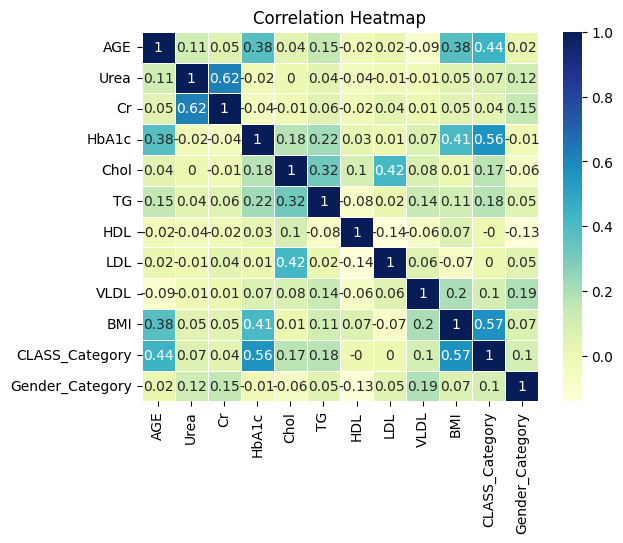

In [87]:
# Pearson Correlation showing on a heatmap
heatmap_data = data.corr(numeric_only = True).round(2)

# Create a heatmap using seaborn
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", linewidths=0.5)

# Set plot title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

count    1000.000000
mean       29.578020
std         4.962388
min        19.000000
25%        26.000000
50%        30.000000
75%        33.000000
max        47.750000
Name: BMI, dtype: float64


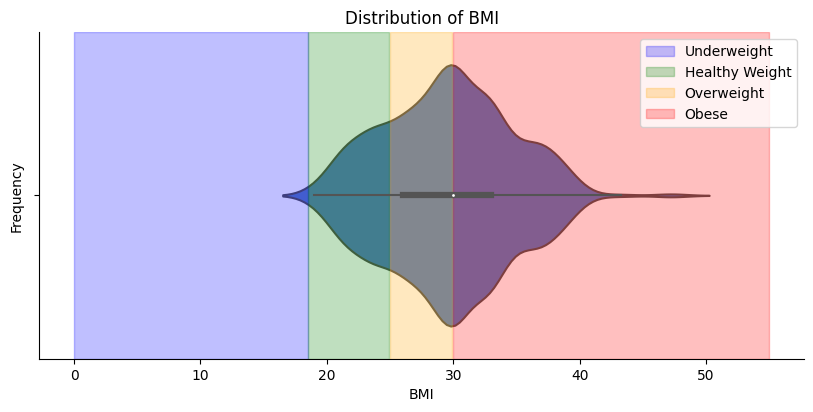

In [88]:
# Based on the heatmap, Age, BMI and HbA1c have correlation with each other
# Let's take a closer look at the BMI distribution and Normal ranges

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

BMI_column = data['BMI']
BMI_statistics = BMI_column.describe()
print(BMI_statistics)

# Create a categorical plot using catplot with violin plot style
g = sns.catplot(data=data, x='BMI', kind='violin', palette='muted', height=4, aspect=2)

# Set the labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')

# Add a legend for the BMI ranges
plt.axvspan(0, 18.5, color='blue', alpha=0.25, label='Underweight')
plt.axvspan(18.5, 24.9, color='green', alpha=0.25, label='Healthy Weight')
plt.axvspan(25.0, 29.9, color='orange', alpha=0.25, label='Overweight')
plt.axvspan(30.0, 55, color='red', alpha=0.25, label='Obese')
plt.legend()

plt.show()


count    1000.000000
mean        8.281160
std         2.534003
min         0.900000
25%         6.500000
50%         8.000000
75%        10.200000
max        16.000000
Name: HbA1c, dtype: float64


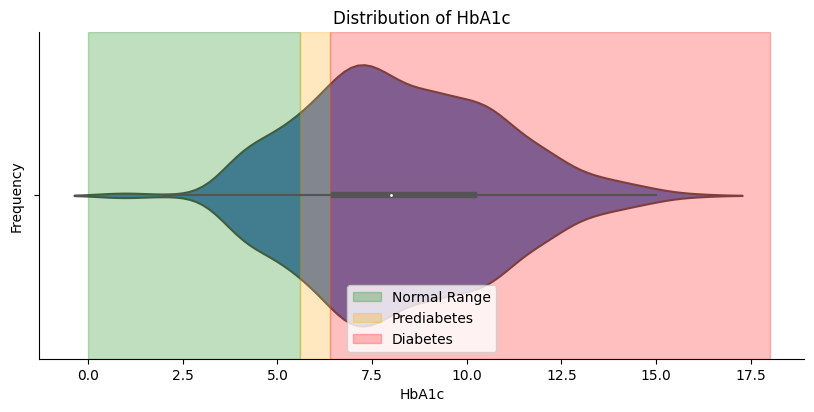

In [89]:
# Based on the heatmap, Age, BMI and HbA1c have correlation with each other
# Let's take a closer look at the HbA1c distribution and Normal ranges

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

HbA1c_column = data['HbA1c']
HbA1c_statistics = HbA1c_column.describe()
print(HbA1c_statistics)

# Create a categorical plot using catplot with violin plot style
g = sns.catplot(data=data, x='HbA1c', kind='violin', palette='muted', height=4, aspect=2)

# Set the labels and title
plt.xlabel('HbA1c')
plt.ylabel('Frequency')
plt.title('Distribution of HbA1c')

# Add a legend for the BMI ranges
plt.axvspan(0, 5.6, color='green', alpha=0.25, label='Normal Range')
plt.axvspan(5.6, 6.4, color='orange', alpha=0.25, label='Prediabetes')
plt.axvspan(6.4, 18, color='red', alpha=0.25, label='Diabetes')
plt.legend()

plt.show()


In [90]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6


In [91]:
import dash
from dash import dcc
from dash import html
import plotly.express as px

# DataFrame = data
available_columns = data.columns.tolist()

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Label('X Variable'),
    dcc.Dropdown(
        id='x-dropdown',
        options=[{'label': col, 'value': col} for col in available_columns],
        value='X'
    ),
    html.Label('Y Variable'),
    dcc.Dropdown(
        id='y-dropdown',
        options=[{'label': col, 'value': col} for col in available_columns],
        value='Y'
    ),
    html.H4('Interactive scatter plot with Diabetes dataset'),
    dcc.Graph(
        id='scatter-plot'
    ),
    html.P("Filter by Gender:"),
    dcc.Dropdown(
        id='gender-dropdown',
        options=[{'label': col, 'value': col} for col in ['ALL' ,"Female", "Male"]],
        value='Gender'
    )
])

# Define the callback to update the scatter plot
@app.callback(
    dash.dependencies.Output('scatter-plot', 'figure'),
    [
        dash.dependencies.Input('x-dropdown', 'value'),
        dash.dependencies.Input('y-dropdown', 'value'),
        dash.dependencies.Input('gender-dropdown', 'value')
    ]
)
def update_scatter_plot(x_var, y_var, gender):
    if gender == 'Female' or gender == 'Male':
        filtered_data = data[data['Gender'] == gender]
    else:
        filtered_data = data.copy()

    fig = px.scatter(filtered_data, x=x_var, y=y_var, color='CLASS', symbol='CLASS')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
# DataFrame = data
available_columns = data.columns.tolist()

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Label('Column'),
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in available_columns],
        value='Column1'
    ),
    dcc.Graph(
        id='histogram-plot'
    )
])

# Define the callback to update the histogram plot
@app.callback(
    dash.dependencies.Output('histogram-plot', 'figure'),
    dash.dependencies.Input('column-dropdown', 'value')
)
def update_histogram_plot(column):
    fig = px.histogram(data, x=column, color='CLASS', pattern_shape='Gender', histnorm = "percent")

    # Overlay both histograms
    fig.update_layout(barmode='overlay')

    # Reduce opacity to see both histograms
    fig.update_traces(opacity=0.75)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

In [ ]:
import dash
from dash import dcc
from dash import html
import seaborn as sns
import plotly.express as px
from dash.dependencies import Input, Output

# DataFrame = data

available_columns = data.columns.tolist()

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div(
    style={'background-color': '#f2f2f2', 'padding': '20px'},
    children=[
        html.H1('Catplot Dashboard', style={'text-align': 'center', 'margin-bottom': '30px'}),
        html.Div(
            style={'background-color': '#ffffff', 'padding': '20px', 'border-radius': '10px'},
            children=[
                html.Label('Column', style={'font-weight': 'bold'}),
                dcc.Dropdown(
                    id='column-dropdown',
                    options=[{'label': col, 'value': col} for col in available_columns],
                    value=available_columns[0],  # Set the default value to the first column
                    style={'width': '250px', 'margin-bottom': '10px'}
                ),
                dcc.Graph(
                    id='cat-plot',
                    config={'displayModeBar': False}  # Hide the plotly mode bar
                )
            ]
        )
    ]
)


# Define the callback to update the cat plot
@app.callback(
    Output('cat-plot', 'figure'),
    Input('column-dropdown', 'value')
)
def update_cat_plot(column):
    # Create the catplot using seaborn
    fig = px.violin(data, x=column, box=True)

    # Set the labels and title
    fig.update_layout(
        xaxis_title=column,
        yaxis_title='Frequency',
        title=f'Catplot Showing Distribution of {column}'
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1



---

## **4 - Machine Learning (ML)**

---



### Split the dataset into 80/20 training/testing split with a random state of 50

In [92]:
data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_Category,Gender_Category
0,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
1,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic,0,1
2,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
3,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
4,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic,0,1


In [93]:
# X and y sets

X = data.drop(['CLASS_Category', 'CLASS', 'Gender'], axis= 1)
y = data['CLASS_Category']

print(X.head())
print()
print(y.head())

   AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Gender_Category
0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0                0
1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0                1
2   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0                0
3   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0                0
4   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0                1

0    0
1    0
2    0
3    0
4    0
Name: CLASS_Category, dtype: int64


In [94]:
# training/testing split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 50)

In [95]:
print(data.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(1000, 14)
(800, 11)
(200, 11)
(800,)
(200,)



---


### ***4.1 - Logistic Regression - Classification***
---


In [96]:
# Training the model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2600)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2600)

In [97]:
#  Prediction on the test set

y_pred = lr.predict(X_test)

In [98]:
# 10 first Prediction values vs real values

print(f"Predictions:\n{list(y_pred[:10])}\n\nReal values: \n{list(y_test[:10])}")

Predictions:
[2, 2, 2, 0, 2, 2, 2, 2, 2, 2]

Real values: 
[2, 2, 2, 0, 2, 2, 2, 2, 2, 2]


In [99]:
# Metrics and model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy score is: {(accuracy_score(y_test, y_pred)*100).round(2)} %")
print(f"Precision score is: {(precision_score(y_test, y_pred, average='macro')*100).round(2)} %")
print(f"Recall score is: {(recall_score(y_test, y_pred, average='macro')*100).round(2)} %")
print(f"f1 score is: {(f1_score(y_test, y_pred, average='macro')*100).round(2)} %")

Accuracy score is: 93.5 %
Precision score is: 67.51 %
Recall score is: 64.06 %
f1 score is: 65.63 %


---

### ***4.2 - Normalization of the data - MinMaxScaler***

---


In [100]:
data

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_Category,Gender_Category
0,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
1,Male,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,Non-Diabetic,0,1
2,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
3,Female,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,Non-Diabetic,0,0
4,Male,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,Non-Diabetic,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Male,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Diabetic,2,1
996,Male,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Diabetic,2,1
997,Male,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Diabetic,2,1
998,Male,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Diabetic,2,1


In [101]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X[['Urea',	'Cr',	'HbA1c',	'Chol',	'TG',	'HDL',	'LDL',	'VLDL']]), columns=X[['Urea',	'Cr',	'HbA1c',	'Chol',	'TG',	'HDL',	'LDL',	'VLDL']].columns)

X_norm = pd.concat([X_norm, X[['AGE', 'BMI', 'Gender_Category']]], axis=1)
X_norm

,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,AGE,BMI,Gender_Category
0,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,50,24.0,0
1,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,26,23.0,1
2,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,50,24.0,0
3,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,50,24.0,0
4,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,33,21.0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,71,30.0,1
996,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,31,37.2,1
997,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,30,27.4,1
998,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,38,40.5,1


In [102]:
# training/testing split on the X_norm dataset

X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X_norm, y, test_size=.2, random_state = 42)

In [103]:
# Training the model

from sklearn.linear_model import LogisticRegression

lr_norm = LogisticRegression(max_iter = 600)
lr_norm.fit(X_norm_train, y_norm_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=600)

In [104]:
# Prediction on the test set

y_norm_pred = lr_norm.predict(X_norm_test)

In [105]:
# 10 first Prediction values vs real values

print(f"Predictions:\n{list(y_norm_pred[:10])}\n\nReal values: \n{list(y_test[:10])}")

Predictions:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Real values: 
[2, 2, 2, 0, 2, 2, 2, 2, 2, 2]


In [106]:
# Metrics and model evaluation

print(f"Accuracy score is: {(accuracy_score(y_norm_test, y_norm_pred)*100).round(2)} %")
print(f"Precision score is: {(precision_score(y_norm_test, y_norm_pred, average='macro')*100).round(2)} %")
print(f"Recall score is: {(recall_score(y_norm_test, y_norm_pred, average='macro')*100).round(2)} %")
print(f"f1 score is: {(f1_score(y_norm_test, y_norm_pred, average='macro')*100).round(2)} %")

Accuracy score is: 92.0 %
Precision score is: 69.9 %
Recall score is: 65.92 %
f1 score is: 64.5 %


---


### ***4.3 - XGboost***
---


In [107]:
from xgboost import XGBClassifier

In [108]:
# Training the model
# create model instance

bst = XGBClassifier(n_estimators=3, max_depth=3, learning_rate=1, objective='multiple:logistic')

In [109]:
# fit model

bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [111]:
# make predictions

y_XG_preds = bst.predict(X_test)

In [112]:
# 10 first Prediction values vs real values

print(f"Predictions:\n{list(y_XG_preds[:10])}\n\nReal values: \n{list(y_test[:10])}")

Predictions:
[2, 2, 2, 0, 2, 2, 2, 2, 2, 2]

Real values: 
[2, 2, 2, 0, 2, 2, 2, 2, 2, 2]


In [113]:
# Metrics and model evaluation

print(f"Accuracy score is: {accuracy_score(y_test, y_XG_preds)*100} %")
print(f"Precision score is: {precision_score(y_test, y_XG_preds, average='macro')*100} %")
print(f"Recall score is: {recall_score(y_test, y_XG_preds, average='macro')*100} %")
print(f"f1 score is: {f1_score(y_test, y_XG_preds, average='macro')*100} %")

Accuracy score is: 100.0 %
Precision score is: 100.0 %
Recall score is: 100.0 %
f1 score is: 100.0 %


---


### ***4.4 - Neural Networks (NN)***
---


In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [115]:
# Convert labels in target variable (y_train) to one-hot encoding

y_NN_train = to_categorical(y_train)

In [116]:
y_NN_train[:3]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [117]:
# Convert labels in target variable (y_test) to one-hot encoding

y_NN_test = to_categorical(y_test)

In [118]:
y_NN_train[:3]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [119]:
# Training the keras model

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(11,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [120]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 18,435
Trainable params: 18,435
Non-trainable params: 0
_________________________________________________________________


In [150]:
# Compile the keras model

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )


In [151]:
# Fit the keras model on the dataset

model.fit(
    X_train,
    y_NN_train,
    epochs=150,
    batch_size=30
)

Epoch 1/150
27/27 [==============================] - 1s 1ms/step - loss: 0.0363 - accuracy: 0.9887
Epoch 2/150
27/27 [==============================] - 0s 1ms/step - loss: 0.0308 - accuracy: 0.9887
Epoch 3/150
27/27 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.9937
Epoch 4/150
27/27 [==============================] - 0s 1ms/step - loss: 0.0077 - accuracy: 0.9987
Epoch 5/150
27/27 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 6/150
27/27 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7/150
27/27 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 8/150
27/27 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9/150
27/27 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 10/150
27/27 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 11/

In [152]:
# Evaluate the keras model

loss, accuracy = model.evaluate(X_train, y_NN_train)

print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 0s 1ms/step - loss: 1.7579e-05 - accuracy: 1.0000
Accuracy: 100.00


In [153]:
# Make class predictions with the model

predictions = model.predict(X_test)
predictions[:3]

7/7 [==============================] - 0s 1ms/step


array([[1.3492018e-18, 4.8876124e-08, 9.9999994e-01],
       [5.8015120e-28, 4.3654719e-11, 9.9999994e-01],
       [1.3997977e-35, 0.0000000e+00, 9.9999994e-01]], dtype=float32)

In [154]:
# Make class predictions with the model but round them into the closest integer

predictions = (model.predict(X_test).round())

predictions[:3]


7/7 [==============================] - 0s 2ms/step


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [155]:
# 10 first Predictions vs real values

print(f"Predictions: \n{predictions[:10]}\n\nReal values: \n{y_NN_test[:10]}")

Predictions: 
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]

Real values: 
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [156]:
# Changing categorical values into integers as it was in the y_test

y_NN_pred = []

for prediction in predictions:
    max_index = np.argmax(prediction)
    y_NN_pred.append(max_index)

y_NN_pred[:5]

[2, 2, 2, 0, 2]

In [157]:
# 40 first Prediction values vs real values

print(f"Predictions:\n{list(y_NN_pred[0:40])}\n\nReal values: \n{list(y_test[0:40])}")

Predictions:
[2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Real values: 
[2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy score is: {(accuracy_score(y_test, y_NN_pred)*100).round(2)} %")
print(f"Precision score is: {(precision_score(y_test, y_NN_pred, average='weighted')*100).round(2)} %")
print(f"Recall score is: {(recall_score(y_test, y_NN_pred, average='weighted')*100).round(2)} %")
print(f"F1 score is: {(f1_score(y_test, y_NN_pred, average='weighted')*100).round(2)} %")

Accuracy score is: 94.0 %
Precision score is: 94.92 %
Recall score is: 94.0 %
F1 score is: 94.17 %
